In [89]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

In [91]:
def initial_plot(points):

    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]

    fig, ax = plt.subplots()
    ax.scatter(x_coords, y_coords, label='Points', color='blue', marker='o')

    display(fig)
    clear_output(wait=True)

    return fig, ax

In [92]:
def update_plot(fig, ax, candidate_points, left_or_right, extreme_point):

    time.sleep(5)

    ax.clear()

    print(candidate_points, ";", left_or_right, ";", extreme_point)

    x, y = zip(*candidate_points)
    ax.scatter(x, y, c='g', marker='o', label='candidate_points')
    
    x, y = left_or_right[0], left_or_right[1] 
    ax.scatter(x, y, c='y', marker='o', label='left_or_right')
    
    x, y = extreme_point[0], extreme_point[1]
    ax.scatter(x, y, c='r', marker='o', label='extreme_point')

    display(fig)
    clear_output(wait=True)

    return fig, ax

Candidate_points []
Left [-1, -5]
Extreme point None


Candidate_points []
right [-5, -3]
Extreme point None


convex_set {(-1, -5), (1, -4), (-5, -3), (0, 0), (-1, 1)}




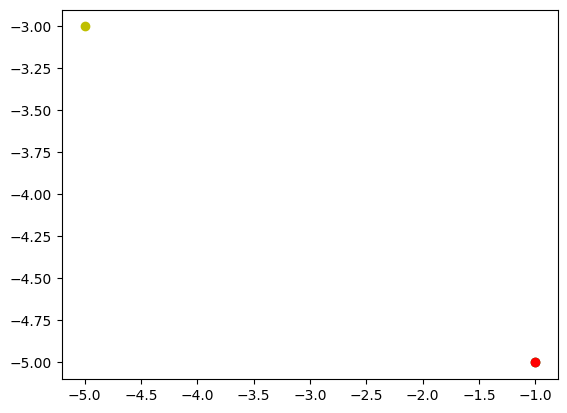

In [97]:
def _det(a, b, c):
 
    # det = (a[0] * b[1] + b[0] * c[1] + c[0] * a[1]) - (a[1] * b[0] + b[1] * c[0] + c[1] * a[0])
    
    # Calculate the determinant of the 2x2 matrix [a, b; c, d]
    ab = a[0] * b[1]
    bc = b[0] * c[1]
    ca = c[0] * a[1]

    ba = a[1] * b[0]
    cb = b[1] * c[0]
    ac = c[1] * a[0]
    
    det = (ab + bc + ca) - (ba + cb + ac)
    
    return det

def convex_hull_recursive(fig, ax, points):
    """
    Constructs the convex hull of a set of 2D points using a divide-and-conquer strategy
    The algorithm exploits the geometric properties of the problem by repeatedly partitioning
    the set of points into smaller hulls, and finding the convex hull of these smaller hulls.
    The union of the convex hull from smaller hulls is the solution to the convex hull of the larger problem.
 
    Parameter
    ---------
    points: array-like of object of Points, lists or tuples.
    The set of  2d points for which the convex-hull is needed
 
    Runtime: O(n log n)
 
    Returns
    -------
    convex_set: list, the convex-hull of points sorted in non-decreasing order.
 
    Examples
    ---------
    >>> convex_hull_recursive([[0, 0], [1, 0], [10, 1]])
    [(0.0, 0.0), (1.0, 0.0), (10.0, 1.0)]
    >>> convex_hull_recursive([[0, 0], [1, 0], [10, 0]])
    [(0.0, 0.0), (10.0, 0.0)]
    >>> convex_hull_recursive([[-1, 1],[-1, -1], [0, 0], [0.5, 0.5], [1, -1], [1, 1], [-0.75, 1]])
    [(-1.0, -1.0), (-1.0, 1.0), (1.0, -1.0), (1.0, 1.0)]
    >>> convex_hull_recursive([(0, 3), (2, 2), (1, 1), (2, 1), (3, 0), (0, 0), (3, 3), (2, -1), (2, -4), (1, -3)])
    [(0.0, 0.0), (0.0, 3.0), (1.0, -3.0), (2.0, -4.0), (3.0, 0.0), (3.0, 3.0)]
 
    """
    points = sorted(points)
    n = len(points)
 
    # divide all the points into an upper hull and a lower hull
    # the left most point and the right most point are definitely
    # members of the convex hull by definition.
    # use these two anchors to divide all the points into two hulls,
    # an upper hull and a lower hull.
 
    # all points to the left (above) the line joining the extreme points belong to the upper hull
    # all points to the right (below) the line joining the extreme points below to the lower hull
    # ignore all points on the line joining the extreme points since they cannot be part of the
    # convex hull

    left_most_point = points[0]
    right_most_point = points[n - 1]
 
    convex_set = {tuple(left_most_point), tuple(right_most_point)}
    upper_hull = []
    lower_hull = []
 
    for i in range(1, n - 1):
        det = _det(left_most_point, right_most_point, points[i])
 
        if det > 0:
            upper_hull.append(points[i])
        elif det < 0:
            lower_hull.append(points[i])

    # print("Upper Hull", upper_hull)
    # print("Lower Hull", lower_hull)
 
    _construct_hull(fig, ax, upper_hull, left_most_point, right_most_point, convex_set)

    _construct_hull(fig, ax, lower_hull, right_most_point, left_most_point, convex_set)

    
 
    return sorted(convex_set)
 
 
def _construct_hull(fig, ax, points, left, right, convex_set):
    """
 
    Parameters
    ---------
    points: list or None, the hull of points from which to choose the next convex-hull point
    left: Point, the point to the left  of line segment joining left and right
    right: The point to the right of the line segment joining left and right
    convex_set: set, the current convex-hull. The state of convex-set gets updated by this function
 
    Note
    ----
    For the line segment 'ab', 'a' is on the left and 'b' on the right.
    but the reverse is true for the line segment 'ba'.
 
    Returns
    -------
    Nothing, only updates the state of convex-set
    """
    # print("Left", points)
    # print("right", left)
    # print("points", right)
    # print("convex_set", convex_set)

    
    

    if points:
        
        extreme_point = None
        extreme_point_distance = float("-inf")
        candidate_points = []
 
        for p in points:
            
            det = _det(left, right, p)
 
            if det > 0:
                
                candidate_points.append(p)
 
                if det > extreme_point_distance:
                    
                    extreme_point_distance = det
                    extreme_point = p

        print("Candidate_points", candidate_points)
        print("Left", left)
        print("Extreme point", extreme_point)
        print("\n")

        print("Candidate_points", candidate_points)
        print("right", right)
        print("Extreme point", extreme_point)
        print("\n")

        print("convex_set", convex_set)
        print("\n")

        time.sleep(2)

        if extreme_point:
            
            fig, ax = update_plot(fig, ax, candidate_points, left, extreme_point)
            _construct_hull(fig, ax, candidate_points, left, extreme_point, convex_set)
            
            convex_set.add(tuple(extreme_point))
            
            fig, ax = update_plot(fig, ax, candidate_points, right, extreme_point)
            _construct_hull(fig, ax, candidate_points, extreme_point, right, convex_set)
           



 
def main():
    # Example usage:
    points = []
    points.append([0, 0])
    points.append([1, -4])
    points.append([-1, -5])
    points.append([-5, -3])
    points.append([-3, -1])
    points.append([-1, -3])
    points.append([-2, -2])
    points.append([-1, -1])
    points.append([-2, -1])
    points.append([-1, 1])

    fig, ax = initial_plot(points)
    
    # the convex set of points is
    # [(0, 0), (0, 3), (1, -3), (2, -4), (3, 0), (3, 3)]
    results_recursive = convex_hull_recursive(fig, ax, points)
 
    # print(results_recursive)
 
 
if __name__ == "__main__":
    main()

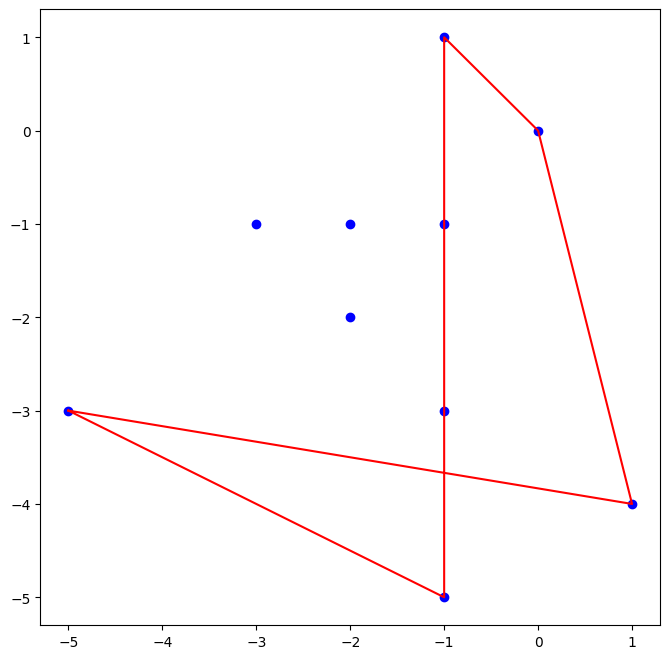

In [102]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

def _det(a, b, c):
    # Calculate the determinant of the 2x2 matrix [a, b; c, d]
    ab = a[0] * b[1]
    bc = b[0] * c[1]
    ca = c[0] * a[1]

    ba = a[1] * b[0]
    cb = b[1] * c[0]
    ac = c[1] * a[0]

    det = (ab + bc + ca) - (ba + cb + ac)

    return det

def convex_hull_recursive(points):
    points = sorted(points)
    n = len(points)

    left_most_point = points[0]
    right_most_point = points[n - 1]

    convex_set = {tuple(left_most_point), tuple(right_most_point)}
    upper_hull = []
    lower_hull = []

    for i in range(1, n - 1):
        det = _det(left_most_point, right_most_point, points[i])

        if det > 0:
            upper_hull.append(points[i])
        elif det < 0:
            lower_hull.append(points[i])

    convex_set.update(_construct_hull(upper_hull, left_most_point, right_most_point))
    convex_set.update(_construct_hull(lower_hull, right_most_point, left_most_point))

    return sorted(convex_set)

def _construct_hull(points, left, right):
    if not points:
        return set()

    extreme_point = None
    extreme_point_distance = float("-inf")
    candidate_points = []

    for p in points:
        det = _det(left, right, p)

        if det > 0:
            candidate_points.append(p)

            if det > extreme_point_distance:
                extreme_point_distance = det
                extreme_point = p

    if extreme_point:
        convex_hull_set = set([tuple(extreme_point)])
        convex_hull_set.update(_construct_hull(candidate_points, left, extreme_point))
        convex_hull_set.update(_construct_hull(candidate_points, extreme_point, right))
        return convex_hull_set
    else:
        return set()

def plot_convex_hull_progress(points):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_title('Convex Hull Visualization')

    for i in range(1, len(points)):
        hull_points = convex_hull_recursive(points[:i+1])
        hull_x, hull_y = zip(*hull_points)

        ax.clear()
        ax.scatter(*zip(*points[:i+1]), color='blue')
        ax.plot(hull_x + (hull_x[0],), hull_y + (hull_y[0],), color='red')
        display(fig)
        clear_output(wait=True)
        time.sleep(1)

    plt.close(fig)

def main():
    # Example usage:
    points = [
        [0, 0], [1, -4], [-1, -5], [-5, -3], [-3, -1],
        [-1, -3], [-2, -2], [-1, -1], [-2, -1], [-1, 1]
    ]

    plot_convex_hull_progress(points)

if __name__ == "__main__":
    main()


# Giftwrapping

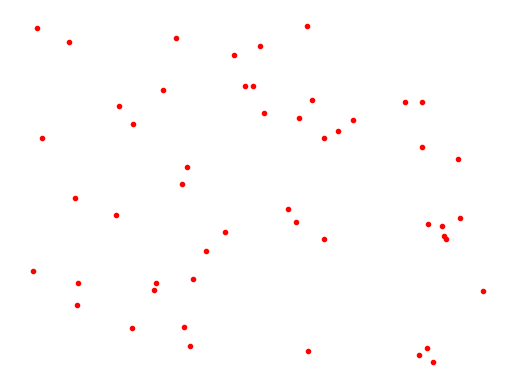

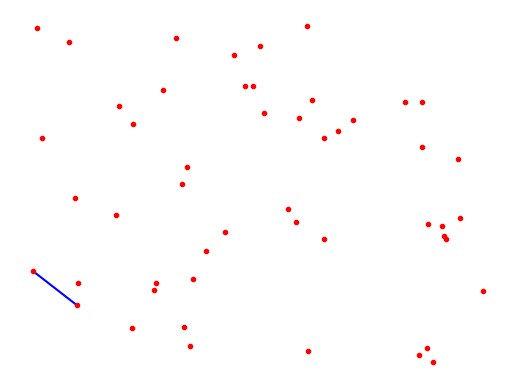

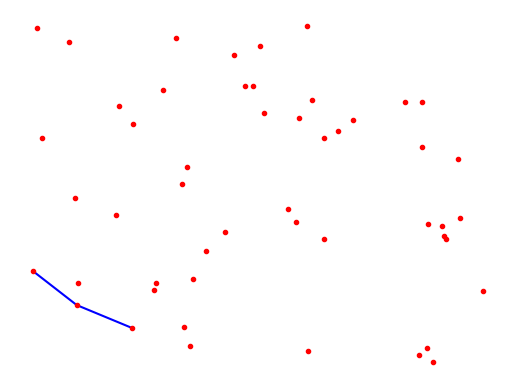

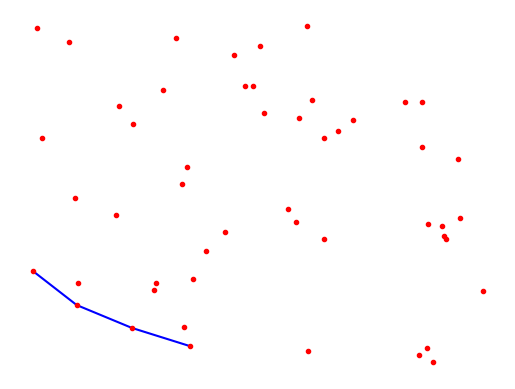

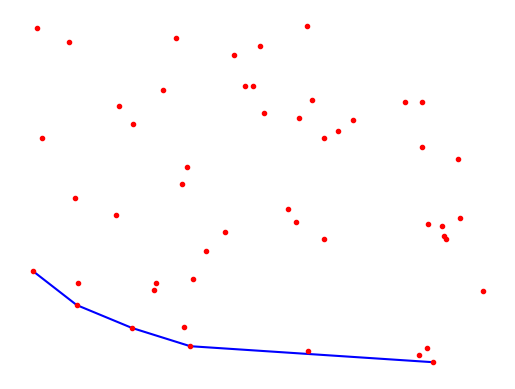

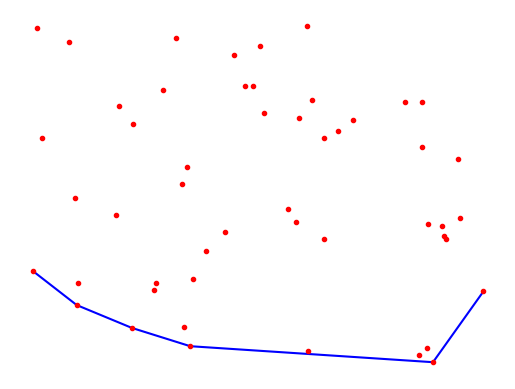

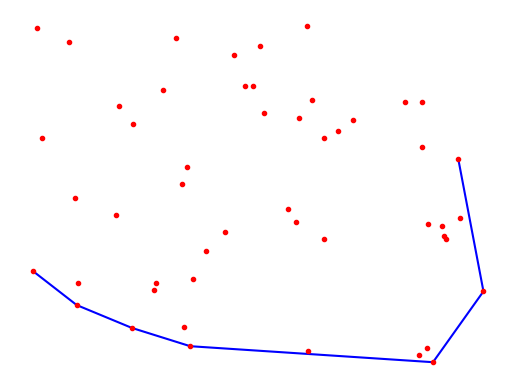

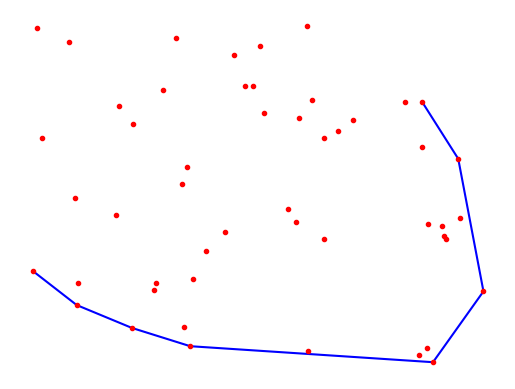

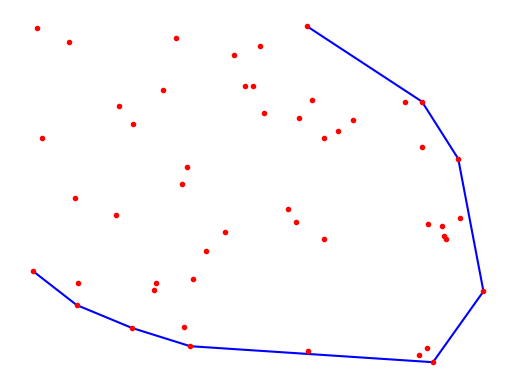

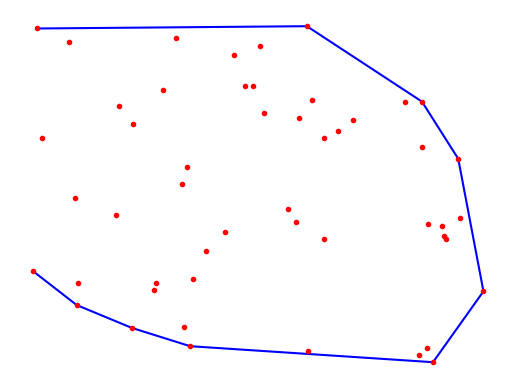

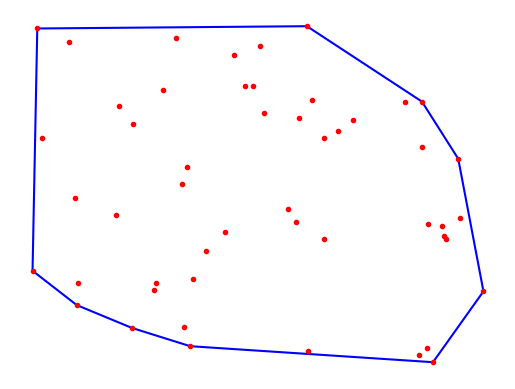

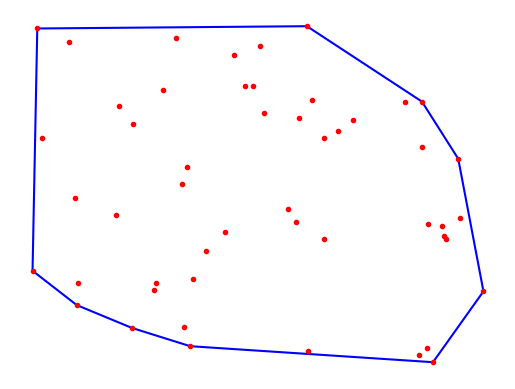

In [27]:
# Author: Rodolfo Ferro 
# Mail: ferro@cimat.mx
# Script: Compute the Convex Hull of a set of points using the Graham Scan

import sys
import numpy as np
import matplotlib.pyplot as plt

# Function to know if we have a CCW turn
def CCW(p1, p2, p3):
	
	if (p3[1]-p1[1])*(p2[0]-p1[0]) >= (p2[1]-p1[1])*(p3[0]-p1[0]):
		return True
	return False

# Main function:
def GiftWrapping(S):
	
	plt.figure()  # Define figure
	
	index = 0
	
	n = len(S)
	P = [None] * n
	l = np.where(S[:,0] == np.min(S[:,0]))
	pointOnHull = S[l[0][0]]
	i = 0
	while True:

		P[i] = pointOnHull
		endpoint = S[0]
		for j in range(1,n):
			if (endpoint[0] == pointOnHull[0] and endpoint[1] == pointOnHull[1]) or not CCW(S[j],P[i],endpoint):
				endpoint = S[j]
		i = i + 1
		pointOnHull = endpoint
		J = np.array([P[k] for k in range(n) if P[k] is not None])
		plt.clf()               # Clear plot
		plt.plot(J[:,0],J[:,1], 'b-', picker=5)   # Plot lines
		plt.plot(S[:,0],S[:,1],".r")              # Plot points
		plt.axis('off')         # No axis
		plt.show(block=False)   # Close plot
		plt.pause(0.0000001)    # Mini-pause before closing plot
		index += 1
		if endpoint[0] == P[0][0] and endpoint[1] == P[0][1]:
			break
		
	for i in range(n):
		if P[-1] is None:
			del P[-1]
	
	P = np.array(P)
	
	# Plot final hull
	plt.clf()
	plt.plot(P[:,0],P[:,1], 'b-', picker=5)
	plt.plot([P[-1,0],P[0,0]],[P[-1,1],P[0,1]], 'b-', picker=5)
	plt.plot(S[:,0],S[:,1],".r")
	plt.axis('off')
	plt.show(block=False)
	plt.pause(0.0000001)
	return P

def main():

	N = 50
  
	# By default we build a random set of N points with coordinates in [0,300)x[0,300):
	P = np.array([(np.random.randint(0,300),np.random.randint(0,300)) for i in range(N)])
	L = GiftWrapping(P)
	
	# We use the predefined figure
	plt.plot(L[:,0],L[:,1], 'b-', picker=5)
	plt.plot([L[-1,0],L[0,0]],[L[-1,1],L[0,1]], 'b-', picker=5)
	plt.plot(P[:,0],P[:,1],".r")
	plt.axis('off')
	plt.show()

if __name__ == '__main__':
	main()

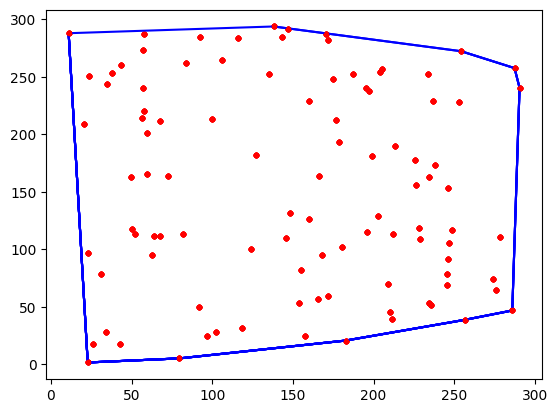

[[187.12899829 252.44317996]
 [287.42743738 257.47240912]
 [153.78756604  53.12483593]
 [ 79.59536683   5.06304684]
 [ 22.80870312   1.51864049]
 [196.23596583 114.85847252]
 [ 49.81680589 163.10826558]
 [ 57.09926985 273.59221848]
 [116.19796694 283.82581153]
 [228.73816366 108.54317499]
 [ 67.4562783  111.44864468]
 [234.30284095 163.20379983]
 [127.1388641  182.2813883 ]
 [245.65811653  68.65659733]
 [ 31.35561531  78.21780433]
 [290.54039642 240.39481713]
 [286.03652064  46.72605923]
 [182.65977255  20.57143912]
 [166.23456238 163.97737473]
 [102.44543328  27.60955128]
 [ 72.64817632 163.68057494]
 [ 57.4740843  220.56673603]
 [234.09120971  53.46444254]
 [248.76321517 116.90394706]
 [246.33195518  91.35550267]
 [211.66874946  38.94847285]
 [143.40316801 284.94013416]
 [ 92.04634283  49.50455648]
 [105.75902724 264.55352964]
 [275.7730255   64.23393587]
 [155.10184299  81.72032096]
 [ 59.65033021 165.15410004]
 [225.53752929 177.92256251]
 [ 22.86224206  96.88287624]
 [237.99625393

In [16]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Function to check if we have a counter-clockwise turn
def is_counter_clockwise(p1, p2, p3):
    
    # Calculate the determinant of the 2x2 matrix [a, b; c, d]
    # ab = a[0] * b[1]
    # bc = b[0] * c[1]
    # ca = c[0] * a[1]

    # ba = a[1] * b[0]
    # cb = b[1] * c[0]
    # ac = c[1] * a[0]

    # det = (ab + bc + ca) - (ba + cb + ac)

    return (p3[1] - p1[1]) * (p2[0] - p1[0]) >= (p2[1] - p1[1]) * (p3[0] - p1[0])

# Main function:
def gift_wrapping_animation(points):

    fig, ax = plt.subplots()
    index = 0
    num_points = len(points)
    convex_hull_points = [None] * num_points
    current_hull_point = points[np.argmin(points[:, 0])]
    i = 0
    
    while True:
        convex_hull_points[i] = current_hull_point
        next_endpoint = points[0]
        
        for j in range(1, num_points):
            if (next_endpoint[0] == current_hull_point[0] and next_endpoint[1] == current_hull_point[1]) or not is_counter_clockwise(points[j], convex_hull_points[i], next_endpoint):
                next_endpoint = points[j]
        
        i += 1
        current_hull_point = next_endpoint
        current_hull = np.array([convex_hull_points[k] for k in range(num_points) if convex_hull_points[k] is not None])
        
        ax.plot(current_hull[:, 0], current_hull[:, 1], 'b-', picker=5)  # Plot lines
        ax.plot(points[:, 0], points[:, 1], ".r")  # Plot points
        
        clear_output(wait=True)
        display(fig)
        
        time.sleep(0.5)
        
        index += 1
        if next_endpoint[0] == convex_hull_points[0][0] and next_endpoint[1] == convex_hull_points[0][1]:
            break
    
    for i in range(num_points):
        if convex_hull_points[-1] is None:
            del convex_hull_points[-1]
    
    convex_hull_points = np.array(convex_hull_points)
    
    # Plot final hull
    ax.plot(convex_hull_points[:, 0], convex_hull_points[:, 1], 'b-', picker=5)
    ax.plot([convex_hull_points[-1, 0], convex_hull_points[0, 0]], [convex_hull_points[-1, 1], convex_hull_points[0, 1]], 'b-', picker=5)
    ax.plot(points[:, 0], points[:, 1], ".r")
    
    clear_output(wait=True)
    display(fig)

    # Close the plot after the loop
    plt.close()

def main():
    num_points = 100
    
    # Generate a random set of num_points with coordinates in [0, 300) x [0, 300)
    random_points = np.array([(np.random.uniform(0, 300), np.random.uniform(0, 300)) for i in range(num_points)])
    gift_wrapping_animation(random_points)

if __name__ == '__main__':
    main()
